Convolutional Neural Networks and Computer Vision with TensorFlow

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pathlib
import random
import os

In [57]:
path = '101_food_classes_10_percent'

all_test_classes = os.listdir(f"{path}/test/")

test_dirs = [item for item in all_test_classes if os.path.isdir(os.path.join(f"{path}/test/", item))]

first_class  = test_dirs[7]
second_class = test_dirs[37] 
third_class  = test_dirs[67]

print(f'Classes names:\n 7: {first_class}\n37: {second_class}\n67: {third_class}')

data_dir = pathlib.Path(f'{path}/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))


Classes names:
 7: bibimbap
37: filet_mignon
67: omelette


In [181]:

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = f"{path}/train/"
valid_dir  = f"{path}/valid/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="categorical", 
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3,
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation="softmax")
])

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

history = model.fit(train_data,
                        epochs=250,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 407ms/step - accuracy: 0.3058 - loss: 1.0984 - val_accuracy: 0.3680 - val_loss: 1.0811
Epoch 2/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 380ms/step - accuracy: 0.3898 - loss: 1.0697 - val_accuracy: 0.3653 - val_loss: 1.0669
Epoch 4/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 380ms/step - accuracy: 0.3751 - loss: 1.0447 - val_accuracy: 0.3840 - val_loss: 1.0488
Epoch 6/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 375ms/step - accuracy: 0.4025 - loss: 1.0281 - val_accuracy: 0.5107 - val_loss: 1.0161
Epoch 8/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 370ms/

First(7) class prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image shape: (512, 512, 3)


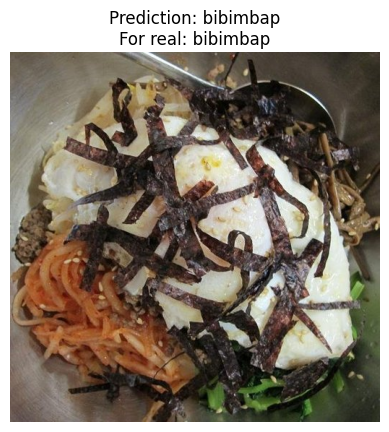

In [183]:
def food_predict(image_class):
    random_image = random.sample(os.listdir(f"{path}/test/{image_class}"), 1)

    img_mpimg = mpimg.imread(f"{path}/test/{image_class}/{random_image[0]}")

    img = tf.io.read_file(f"{path}/test/{image_class}/{random_image[0]}")
    img = tf.image.decode_image(img, channels=3)
    new_size = [224, 224] 
    img = tf.image.resize(img, size = new_size)
    img = img/255.
    img = tf.expand_dims(img, axis=0)

    img_prediction = model.predict(img)
    pred_class = class_names[int(tf.round(img_prediction)[0][0])]

    plt.imshow(img_mpimg)
    plt.title(f"Prediction: {pred_class}\nFor real: {image_class}")
    plt.axis(False)
    print(f"Image shape: {img_mpimg.shape}")
food_predict(first_class)


Second(37) class prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Image shape: (512, 512, 3)


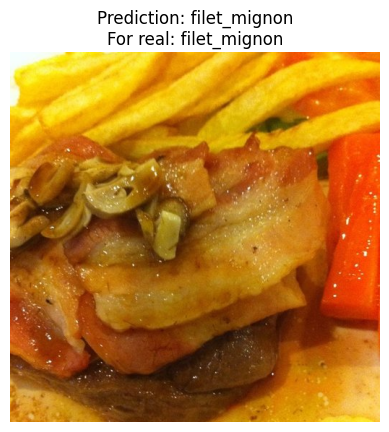

In [207]:
food_predict(second_class)

Third(67) class prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Image shape: (512, 384, 3)


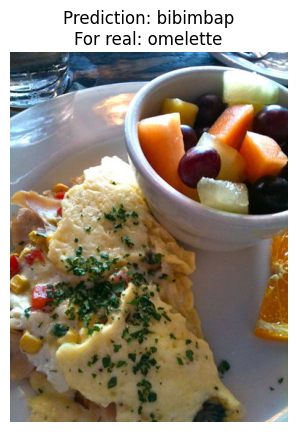

In [325]:
food_predict(third_class)

Metrics

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_64 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │        84,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261,851 (1022.86 KB)

 Trainable params: 87,283 (340.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 174,568 (681.91 KB)

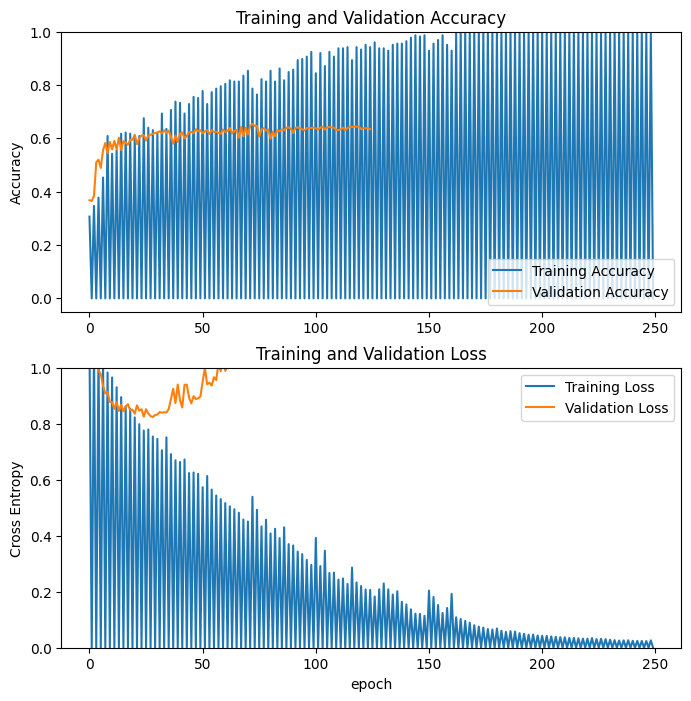

In [327]:
import pandas as pd
# pd.DataFrame(history_1.history).plot(figsize=(10, 7))
model.summary()

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(history.history['loss']))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
